# K-Nearest Neighbours

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from lib.visualisation import clusterplot_2D, decisionplot_2D

# Overview of K-Nearest Neighbours (K-NN)

The intuition revolves around the idea of a neighbourhood surrounding a point. On its own, K-Nearest Neighbours simply creates a data structure that identifies the K-nearest datapoints for all datapoints. This data structure can then be used to make heuristic decisions about how to cluster the datapoints. 

Many other more sophisticated clustering algorithms builds upon the K-NN algorithm and implements how the model should assign datapoints to cluster based on characteristics of their nearest neighbours.

# Distance Computation

The **brute force** method to create the Nearest Neighbour datastructure is to compute the pairwise distance for every point to every other point. Thanks to being embarassingly parallel, the brute force algorithm might perform much better than the other algorithms despite having a theoretically worse time complexity.

2 other algorithms that construct a Tree-like data structure for the Nearest Neighbour query is the **K-D Tree** and the **Ball Tree**. The algorithm details can be found in the [Scikit-learn Nearest Neighbours User Guide](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms) and are scalable to larger datasets.

In [2]:
points = np.random.random(size=(100000,200))

In [3]:
%%timeit
NearestNeighbors(5, algorithm = 'brute', n_jobs=4).fit(points)

27.2 ms ± 572 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit
NearestNeighbors(5, algorithm = 'ball_tree', n_jobs=4).fit(points)

4.68 s ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
NearestNeighbors(5, algorithm = 'kd_tree', n_jobs=4).fit(points)

6.34 s ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Supervised Classification

## 1. Majority Vote from Neighbourhood

The simplest way to use K-NN for classification would be to assign the data point to the majority group in its neighbourhood. This majority classification can work well if every group is sufficiently different from each other. 

However, majority vote may have troubles when:
 - there are intermediate groups that exhibit a mix of characteristics between 2 other groups
 - when there are too many characteristics to consider, diluting what defines each group (i.e. very high-dimensional data)

In [9]:
dataset = make_moons(
    (1000, 1000),
    noise = 0.1,
    random_state = 51517731
)

# standard train-test split
x_train, x_test, y_train, y_test = train_test_split(
    dataset[0], dataset[1], test_size=0.3, stratify=dataset[1])

In [10]:
neighbors = KNeighborsClassifier(5)
neighbors.fit(x_train, y_train)

KNeighborsClassifier()

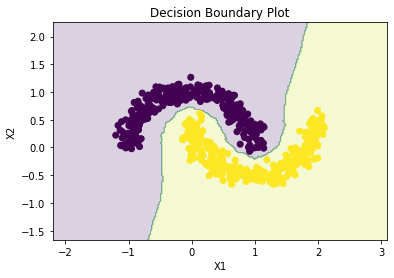

In [15]:
# show decision boundaries using a 2D contour map
fig, ax = plt.subplots(figsize=(6, 4))
decisionplot_2D(x_test, neighbors, ax=ax, c=neighbors.predict(x_test))

In [21]:
# try a demo point for the above model
neighbors.predict([[-1, 0], [0,-1],[1.2,0.5]])

array([0, 1, 0], dtype=int64)

## 2. Joining the Closest Neighbour

Another way to group your data is to simply say that the data point is most similar to the nearest neighbour and simply grouping them together.